In [1]:
from tshpo.lib_class import AnaHelper
import pandas as pd

# ID202410311542173396292
_file = "c05_effect_of_hpo_v3_original_20241031_1139.csv.gz"
df = pd.concat([
    AnaHelper.load_acc_select(_file, alpha=0.01, n_exploration=[10, 100, 200])]
)
df

Parse configs


100%|██████████| 414/414 [00:15<00:00, 27.01it/s]


,top_n,acc,dataset,metric,fsm,fsr,dsm,dsr,n_exploration,hpo_opt_method
0,1,0,dresses-sales,roc_auc,RF,0.3,Halton,0.3,10,HB
1,2,1,dresses-sales,roc_auc,RF,0.3,Halton,0.3,10,HB
2,3,1,dresses-sales,roc_auc,RF,0.3,Halton,0.3,10,HB
3,4,1,dresses-sales,roc_auc,RF,0.3,Halton,0.3,10,HB
4,5,1,dresses-sales,roc_auc,RF,0.3,Halton,0.3,10,HB
...,...,...,...,...,...,...,...,...,...,...
3307,4,1,phoneme,accuracy,RF,0.3,Halton,0.3,200,BO
3308,5,1,phoneme,accuracy,RF,0.3,Halton,0.3,200,BO
3309,6,1,phoneme,accuracy,RF,0.3,Halton,0.3,200,BO
3310,7,1,phoneme,accuracy,RF,0.3,Halton,0.3,200,BO


In [2]:
datasets = df['dataset'].drop_duplicates().tolist()
len(datasets)

23

In [3]:
df = df[df['top_n'] < 7]
adf = df.groupby(by=['top_n', 'metric', 'fsm', 'fsr', 'dsm', 'dsr', 'n_exploration', 'hpo_opt_method'])[
          'acc'].sum() / len(datasets)
adf = adf.reset_index()
adf['metric'] = adf['metric'].apply(lambda x: AnaHelper.normal_metric_name(x))
adf = AnaHelper.append_normal_hpo_name(adf)
adf

,top_n,metric,fsm,fsr,dsm,dsr,n_exploration,hpo_opt_method,acc
0,1,Accuracy,RF,0.3,Halton,0.3,10,BO,0.695652
1,1,Accuracy,RF,0.3,Halton,0.3,10,HB,0.695652
2,1,Accuracy,RF,0.3,Halton,0.3,10,RS,0.695652
3,1,Accuracy,RF,0.3,Halton,0.3,100,BO,0.869565
4,1,Accuracy,RF,0.3,Halton,0.3,100,HB,0.869565
...,...,...,...,...,...,...,...,...,...
103,6,ROC AUC,RF,0.3,Halton,0.3,100,HB,1.000000
104,6,ROC AUC,RF,0.3,Halton,0.3,100,RS,1.000000
105,6,ROC AUC,RF,0.3,Halton,0.3,200,BO,1.000000
106,6,ROC AUC,RF,0.3,Halton,0.3,200,HB,1.000000


In [4]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import seaborn as sns


Saved to /Users/sunwu/SW-Research/AutoML-Benchmark/tshpo/runtime/exp_outputs/effect_of_hpo_of_preselect.pdf


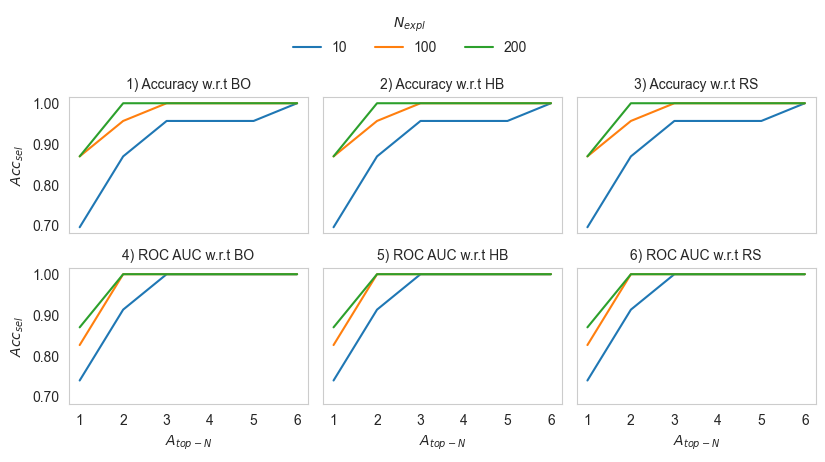

In [5]:
# ID2024112716481646119263
from tshpo.lib_class import FileHelper
from tshpo.ana_libs import PaperLabel
# 行（row）抽样算法对精度的影响, 禁用列抽样
import warnings

warnings.filterwarnings("ignore")
adf = adf[~adf['hpo_opt_method'].isin(['SOAR'])]
g = sns.FacetGrid(adf, row="metric", col="hpo_opt_method", height=2, aspect=1.4, despine=False, sharey=True)
# g = sns.FacetGrid(adf,row="metric", col="hpo_opt_method", height=2, aspect=1, despine=False, sharey=True)
g.map_dataframe(sns.lineplot, x='top_n', y='acc', hue='n_exploration', palette=sns.color_palette())
counter = 0
ax = None
for (_hpo_opt_method, _metric), ax in g.axes_dict.items():
    counter += 1
    ax = ax
    # ax.set_title(f"{counter}) {ax.get_title()}".replace("dsm","rsm").replace("dsr","rsr"))
    ax.set_title(f"{counter}) {_hpo_opt_method} w.r.t {_metric}", fontsize=10)
    # if ax.get_title().find("AUC")>-1:
    #     ax.set_ylim(0.65,1.01)
    # else:
    # ax.set_ylim(0.4,1.01)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    if ax.get_xlabel() != "":
        ax.set_xlabel(PaperLabel.TOP_N_SELECTED_ALGORITHMS)
    if ax.get_ylabel() != "":
        ax.set_ylabel(PaperLabel.ACC_SELECT)
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
    ax.grid(False)
    ax.set_xticks([1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6])
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
    ax.grid(False)
    # handles, labels = ax.get_legend_handles_labels()
    # ax.legend(handles, labels, title="$rsr$")
handles, labels = ax.get_legend_handles_labels()
g.add_legend(handles=handles, labels=labels, title="$N_{expl}$", loc="upper center", bbox_to_anchor=(0.39, 1.15),
             ncol=5)
# g.savefig(f"effect_of_hpo_of_preselect.pdf", bbox_inches='tight')
FileHelper().to_pdf(g, f"effect_of_hpo_of_preselect.pdf")